In [17]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import Asso, AssoTrans, AssoOpt, AssoExIterate
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate Boolean matrix

In [18]:
# generate arbitrary Boolean matrix (X)
from generators import BlockDiagonalMatrixGenerator, BlockMatrixGenerator

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.5, 0.2]
size_range=[0.25, 0.75, 0.25, 1.0]

X = BlockMatrixGenerator(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
# X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.5 0.2]
[I] seed         : 1024
[I] Using RandomState.


In [19]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)
X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

In [20]:
k = 5
tau = 0.30
tau = 0.30
w = [0.75, 0.25]

# empty table
from utils import add_log

# metrics from sklearn is included for checking
metrics = ['Recall', 'Precision', 'Error', 'Accuracy', 'F1', 'recall_score', 'precision_score', 'accuracy_score', 'f1_score']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
# df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

In [21]:
asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='reconstruction') # assign X_val and task to activate per-step eval

results = asso.eval(X_val, metrics=metrics, task='reconstruction')
add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.75, 0.25]
[I] task         : reconstruction


100%|██████████| 5/5 [00:21<00:00,  4.39s/it]                


,time,k,tau,p_pos,p_neg,Recall,Precision,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2024-01-10 23:19:58.111296,5,0.3,0.75,0.25,0.232242,0.394988,0.250848,0.749152,0.292501,0.232242,0.394988,0.749152,0.292501


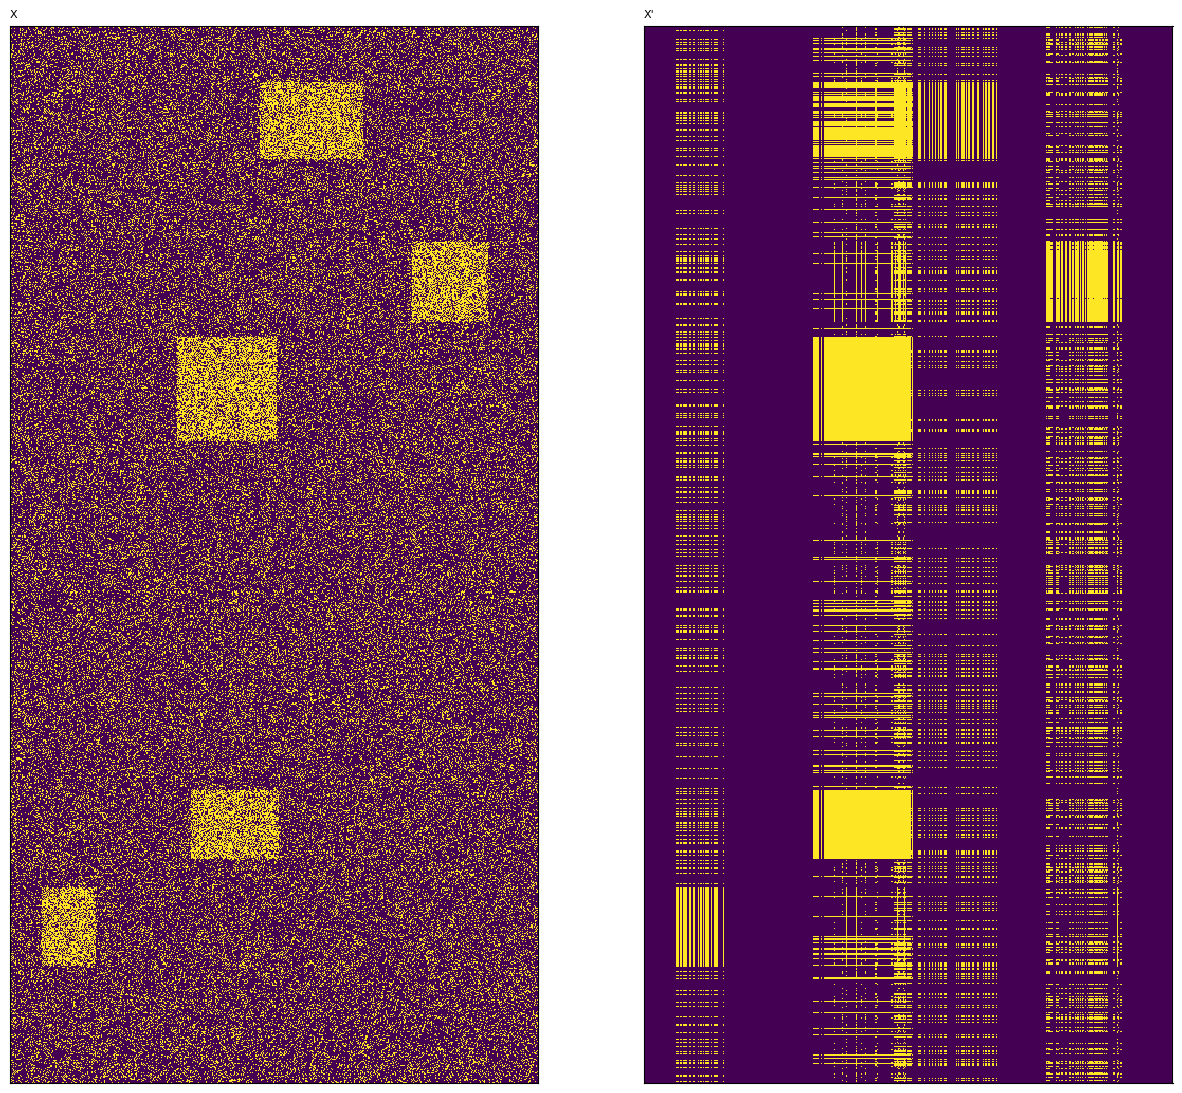

In [22]:
from utils import matmul, to_dense, show_matrix

settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings)

### 3. AssoTrans

In [23]:
asso = AssoExIterate(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='reconstruction')

results = asso.eval(X_val, metrics=metrics, task='reconstruction')
add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.75, 0.25]
[I] task         : reconstruction


k = 0, after getting cols, best_cover = 5215.25


k = 0, after getting rows, best_cover = 6100.0


k = 0, after getting cols, best_cover = 6654.5


k = 0, after getting rows, best_cover = 6893.0


k = 0, after getting cols, best_cover = 6916.0


k = 0, after getting rows, best_cover = 6917.5


k = 0, after getting cols, best_cover = 6917.75


k = 0, after getting rows, best_cover = 6917.75


k = 0, after getting cols, best_cover = 6917.75


 20%|██        | 1/5 [01:05<04:23, 65.94s/it]                

[W] best cover score is not improving.


k = 1, after getting cols, best_cover = 7685.5


k = 1, after getting rows, best_cover = 8333.0


k = 1, after getting cols, best_cover = 8569.5


k = 1, after getting rows, best_cover = 8606.0


k = 1, after getting cols, best_cover = 8633.25


k = 1, after getting rows, best_cover = 8640.25


k = 1, after getting cols, best_cover = 8648.0


k = 1, after getting rows, best_cover = 8651.25


k = 1, after getting cols, best_cover = 8660.5


k = 1, after getting rows, best_cover = 8660.5


k = 1, after getting cols, best_cover = 8660.5


k = 1, after getting rows, best_cover = 8661.5


k = 1, after getting cols, best_cover = 8664.5


k = 1, after getting rows, best_cover = 8665.25


k = 1, after getting cols, best_cover = 8665.75


k = 1, after getting rows, best_cover = 8666.25


k = 1, after getting cols, best_cover = 8666.75


k = 1, after getting rows, best_cover = 8666.75


k = 1, after getting cols, best_cover = 8666.75


 40%|████      | 2/5 [03:31<05:38, 112.97s/it]              

[W] best cover score is not improving.


k = 2, after getting cols, best_cover = 8922.75


k = 2, after getting rows, best_cover = 9078.75


k = 2, after getting cols, best_cover = 9202.0


k = 2, after getting rows, best_cover = 9234.5


k = 2, after getting cols, best_cover = 9274.0


k = 2, after getting rows, best_cover = 9292.5


k = 2, after getting cols, best_cover = 9329.0


k = 2, after getting rows, best_cover = 9336.0


k = 2, after getting cols, best_cover = 9358.5


k = 2, after getting rows, best_cover = 9362.75


k = 2, after getting cols, best_cover = 9375.75


k = 2, after getting rows, best_cover = 9375.75


k = 2, after getting cols, best_cover = 9381.0


k = 2, after getting rows, best_cover = 9381.25


k = 2, after getting cols, best_cover = 9382.25


k = 2, after getting rows, best_cover = 9386.0


k = 2, after getting cols, best_cover = 9398.0


k = 2, after getting rows, best_cover = 9401.0


k = 2, after getting cols, best_cover = 9406.75


k = 2, after getting rows, best_cover = 9407.5


k = 2, after getting cols, best_cover = 9409.25


k = 2, after getting rows, best_cover = 9410.25


k = 2, after getting cols, best_cover = 9411.25


k = 2, after getting rows, best_cover = 9412.5


k = 2, after getting cols, best_cover = 9415.0


k = 2, after getting rows, best_cover = 9415.25


k = 2, after getting cols, best_cover = 9415.75


k = 2, after getting rows, best_cover = 9415.75


k = 2, after getting cols, best_cover = 9415.75


 60%|██████    | 3/5 [07:05<05:17, 158.95s/it]              

[W] best cover score is not improving.


k = 3, after getting cols, best_cover = 9957.0


k = 3, after getting rows, best_cover = 9984.25


k = 3, after getting cols, best_cover = 10002.25


k = 3, after getting rows, best_cover = 10004.0


k = 3, after getting cols, best_cover = 10013.75


k = 3, after getting rows, best_cover = 10014.25


k = 3, after getting cols, best_cover = 10022.25


k = 3, after getting rows, best_cover = 10023.25


k = 3, after getting cols, best_cover = 10032.25


k = 3, after getting rows, best_cover = 10032.75


k = 3, after getting cols, best_cover = 10034.25


k = 3, after getting rows, best_cover = 10034.25


k = 3, after getting cols, best_cover = 10044.5


k = 3, after getting rows, best_cover = 10046.5


k = 3, after getting cols, best_cover = 10059.5


k = 3, after getting rows, best_cover = 10066.0


k = 3, after getting cols, best_cover = 10078.75


k = 3, after getting rows, best_cover = 10087.0


k = 3, after getting cols, best_cover = 10093.25


k = 3, after getting rows, best_cover = 10095.75


k = 3, after getting cols, best_cover = 10098.5


k = 3, after getting rows, best_cover = 10099.75


k = 3, after getting cols, best_cover = 10101.75


k = 3, after getting rows, best_cover = 10102.5


k = 3, after getting cols, best_cover = 10104.0


k = 3, after getting rows, best_cover = 10104.0


k = 3, after getting cols, best_cover = 10107.5


k = 3, after getting rows, best_cover = 10107.5


k = 3, after getting cols, best_cover = 10107.5


 80%|████████  | 4/5 [10:49<03:04, 184.82s/it]              

[W] best cover score is not improving.


k = 4, after getting cols, best_cover = 10578.0


k = 4, after getting rows, best_cover = 10589.25


k = 4, after getting cols, best_cover = 10607.5


k = 4, after getting rows, best_cover = 10610.25


k = 4, after getting cols, best_cover = 10621.25


k = 4, after getting rows, best_cover = 10629.5


k = 4, after getting cols, best_cover = 10642.0


k = 4, after getting rows, best_cover = 10647.0


k = 4, after getting cols, best_cover = 10653.25


k = 4, after getting rows, best_cover = 10656.0


k = 4, after getting cols, best_cover = 10659.25


k = 4, after getting rows, best_cover = 10660.0


k = 4, after getting cols, best_cover = 10663.25


k = 4, after getting rows, best_cover = 10665.0


k = 4, after getting cols, best_cover = 10668.25


k = 4, after getting rows, best_cover = 10668.25


k = 4, after getting cols, best_cover = 10669.25


k = 4, after getting rows, best_cover = 10669.75


k = 4, after getting cols, best_cover = 10671.75


k = 4, after getting rows, best_cover = 10672.25


k = 4, after getting cols, best_cover = 10673.25


k = 4, after getting rows, best_cover = 10673.25


k = 4, after getting cols, best_cover = 10673.25


100%|██████████| 5/5 [14:11<00:00, 170.23s/it]              


[W] best cover score is not improving.


,time,k,tau,p_pos,p_neg,Recall,Precision,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2024-01-10 23:19:58.111296,5,0.3,0.75,0.25,0.232242,0.394988,0.250848,0.749152,0.292501,0.232242,0.394988,0.749152,0.292501
1,2024-01-10 23:34:10.542143,5,0.3,0.75,0.25,0.404056,0.327489,0.318322,0.681678,0.361766,0.404056,0.327489,0.681678,0.361766


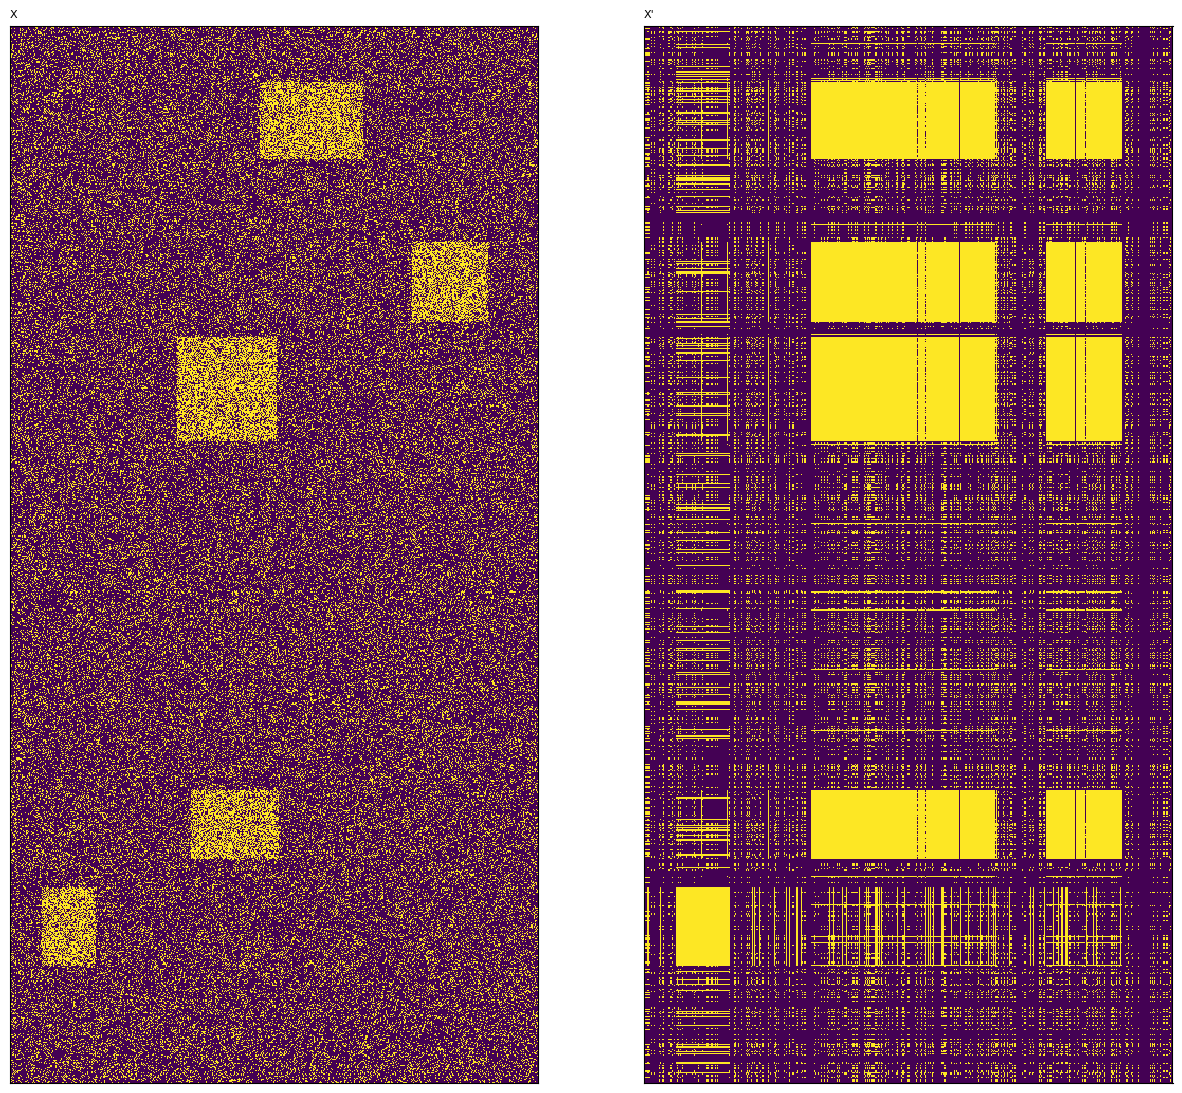

In [24]:
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(asso.U, asso.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings)

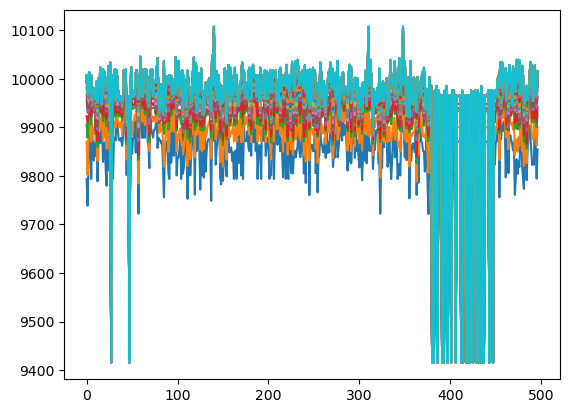

In [32]:
import matplotlib.pyplot as plt

plt.plot(asso.scores[3])